In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os,sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#read data
data=pd.read_csv('bank-full.csv')

In [79]:
data.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
0,58,2143,5,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,1,-1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,1,-1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [4]:
data.shape

(45211, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
#Descriptive statistics
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#print continuous variables
print("continuous variables\n")
data_cont=data.describe().columns
print(data_cont)

continuous variables

Index([u'age', u'balance', u'day', u'duration', u'campaign', u'pdays',
       u'previous'],
      dtype='object')


In [8]:
#print categorical variables
print("categorical variables\n")
data_cat=data.describe(include=[object]).columns
print(data_cat)

categorical variables

Index([u'job', u'marital', u'education', u'default', u'housing', u'loan',
       u'contact', u'month', u'poutcome', u'Target'],
      dtype='object')


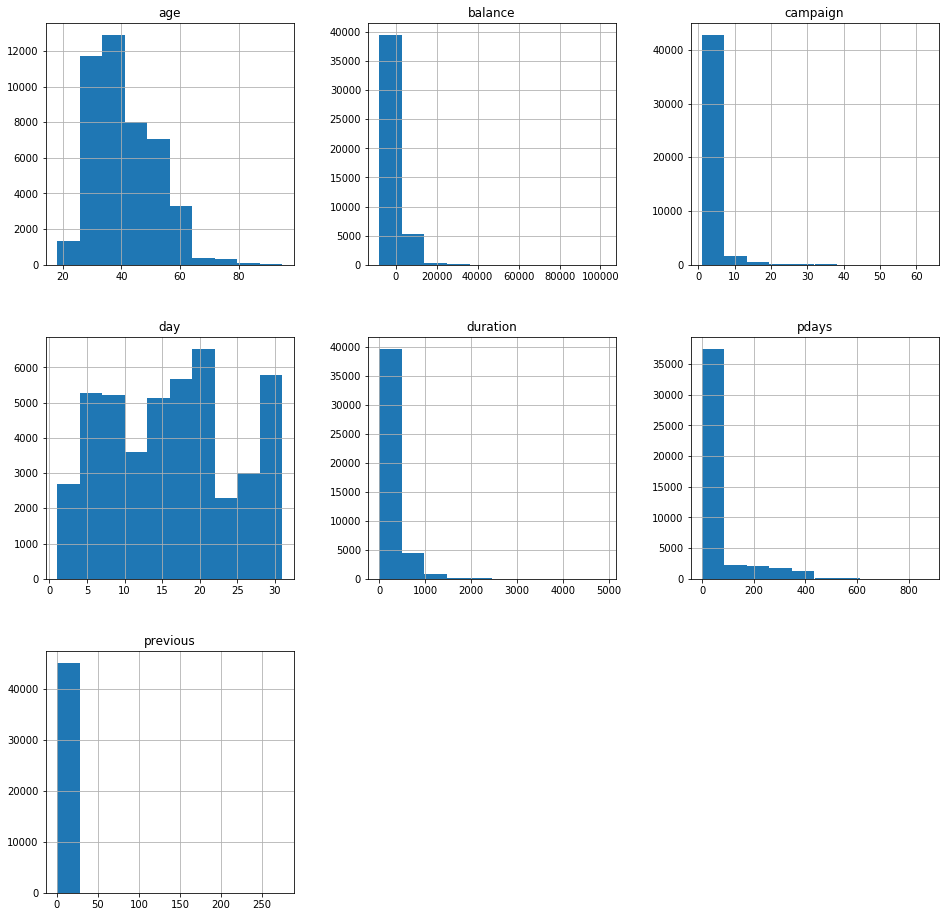

In [9]:
#visualizing continuous variables
data.hist(column=data_cont,figsize=(16,16))
plt.show()

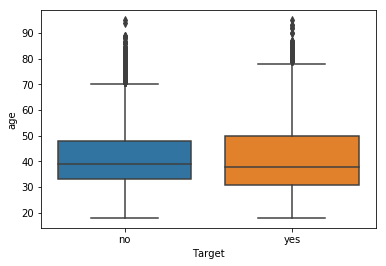

In [10]:
sns.boxplot(data=data,x="Target",y="age")
plt.show()

The median age for both the groups(those subscribed and not) is around 37 to 40 and also there is overlapping for both the groups which indicates that age is not a good indicator to predict which customer will subscribe or not subscribe

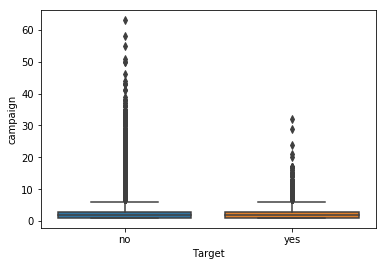

In [11]:
sns.boxplot(data=data,x="Target",y="campaign")
plt.show()

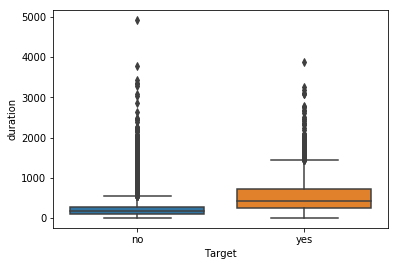

In [12]:
sns.boxplot(data=data,x="Target",y="duration")
plt.show()

From the plot its clear that duration can be useful for predicting the target variable

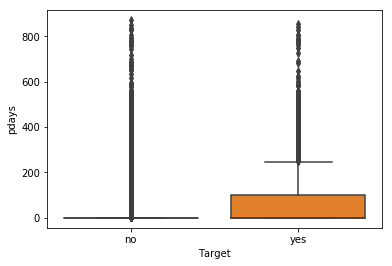

In [13]:
sns.boxplot(data=data,x="Target",y="pdays")
plt.show()

In [14]:
data["pdays"].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [15]:
data["pdays"].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

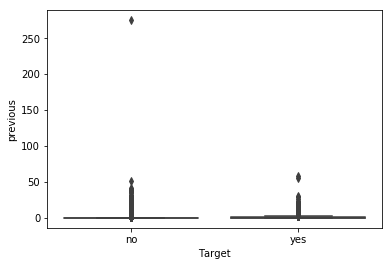

In [16]:
sns.boxplot(data=data,x="Target",y="previous")
plt.show()

In [17]:
data["previous"].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [18]:
data["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

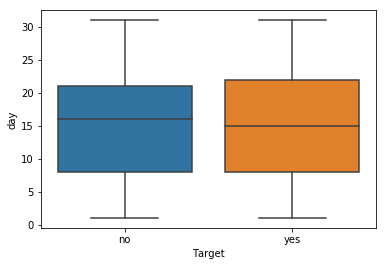

In [19]:
sns.boxplot(data=data,x="Target",y="day")
plt.show()

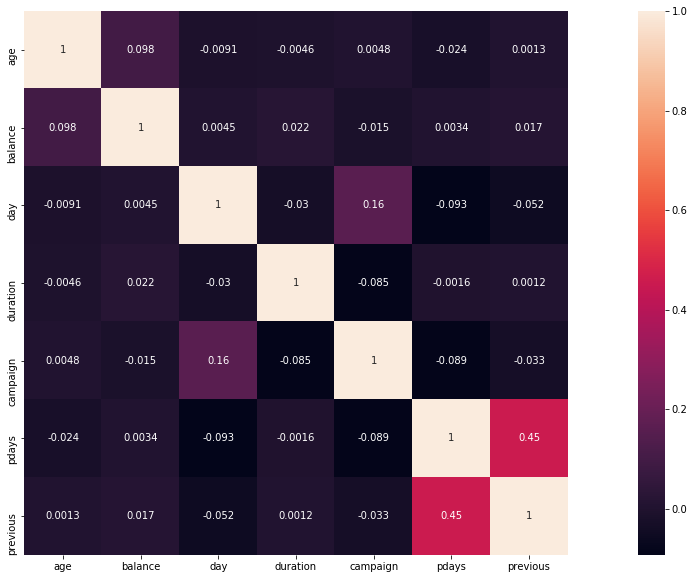

In [20]:
correlation=data.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

Slight correlation between previous and pdays

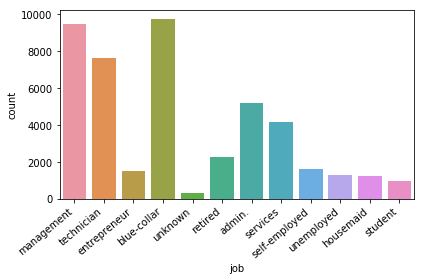

In [21]:
#visualizing categorical variables
ax = sns.countplot(x="job",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


Most of the customers have job "management","Blue-collar","Technician"

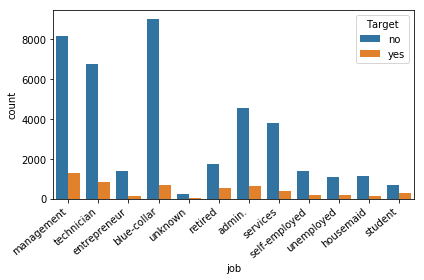

In [22]:
ax = sns.countplot(x="job",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



from the above plot customers from management has the highest rate of subscribing the loan

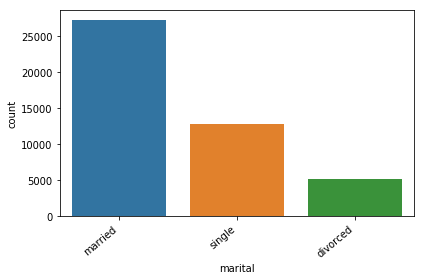

In [23]:
ax = sns.countplot(x="marital",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

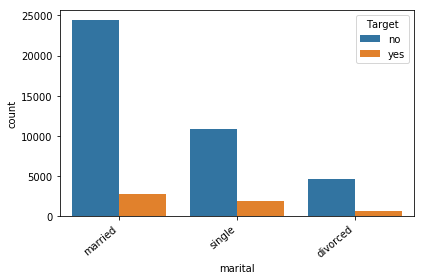

In [24]:
ax = sns.countplot(x="marital",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

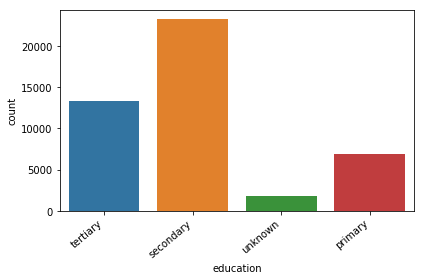

In [25]:
ax = sns.countplot(x="education",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

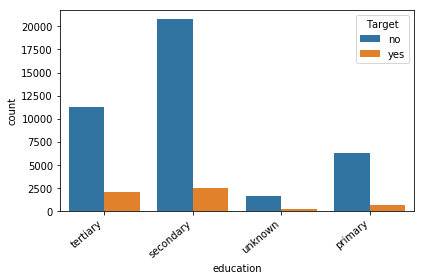

In [26]:
ax = sns.countplot(x="education",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

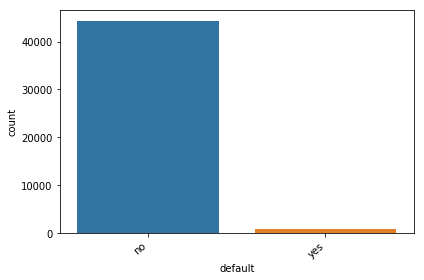

In [27]:
ax = sns.countplot(x="default",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

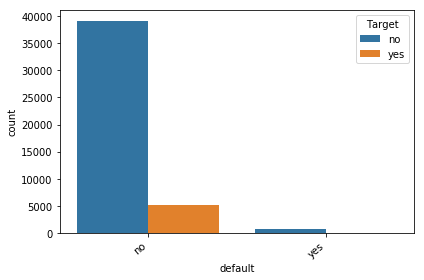

In [28]:
ax = sns.countplot(x="default",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

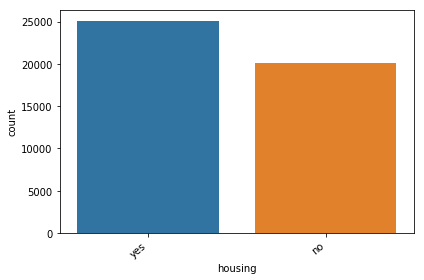

In [29]:
ax = sns.countplot(x="housing",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

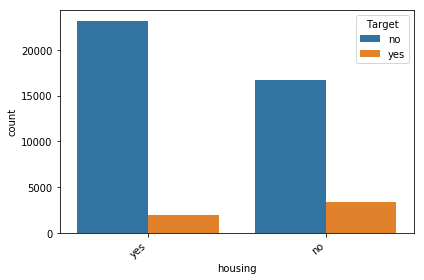

In [30]:
ax = sns.countplot(x="housing",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

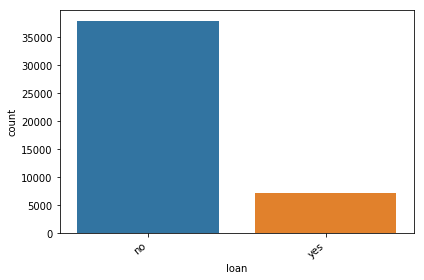

In [31]:
ax = sns.countplot(x="loan",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

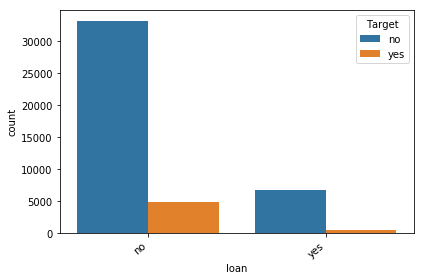

In [32]:
ax = sns.countplot(x="loan",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

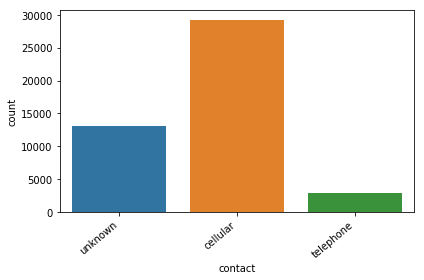

In [33]:
ax = sns.countplot(x="contact",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

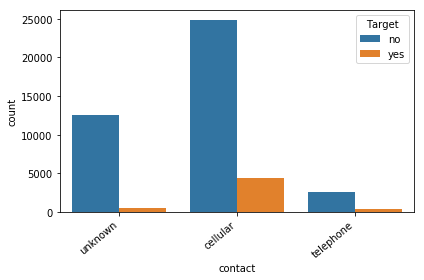

In [34]:
ax = sns.countplot(x="contact",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

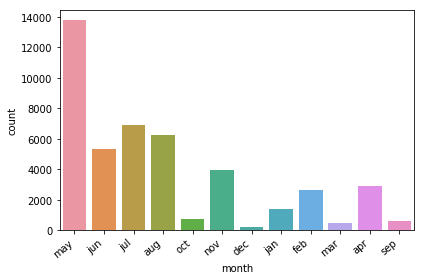

In [35]:
ax = sns.countplot(x="month",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

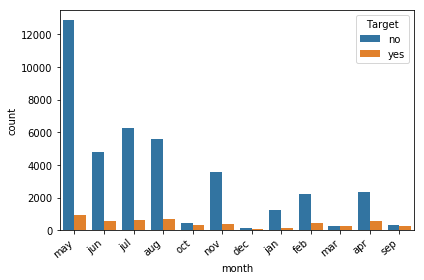

In [36]:
ax = sns.countplot(x="month",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

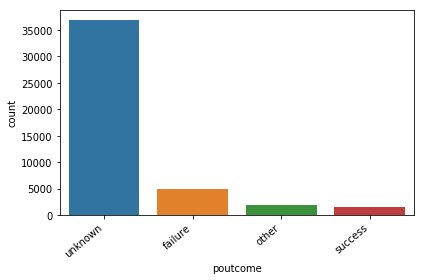

In [37]:
ax = sns.countplot(x="poutcome",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

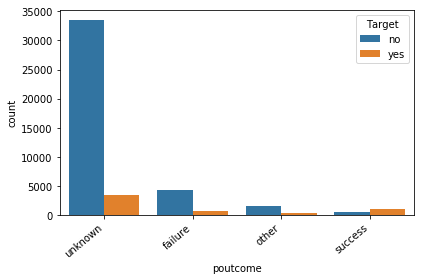

In [38]:
ax = sns.countplot(x="poutcome",data=data,hue="Target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Data Preprocessing

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [40]:
data.isnull().values.any()

False

indicates that there are no missing values in data set

One hot encoding

In [41]:
col=data.select_dtypes(include=[object]).columns

In [42]:
data=pd.concat([data,pd.get_dummies(data[col])],axis=1)

In [43]:
data=data.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month','poutcome', 'Target','duration'], axis =1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_divorced       45211 non-null uint8
marital_married        45211 non-null uint8
marital_sin

In [45]:
#Normalization
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(data),columns=data.columns)

C:\Users\asus\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
y = data_scaled.Target_yes
data_scaled = data_scaled.drop(['Target_yes','Target_no'], axis = 1)

In [47]:
#Test - Train Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=42)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 10747 to 15795
Data columns (total 50 columns):
age                    31647 non-null float64
balance                31647 non-null float64
day                    31647 non-null float64
campaign               31647 non-null float64
pdays                  31647 non-null float64
previous               31647 non-null float64
job_admin.             31647 non-null float64
job_blue-collar        31647 non-null float64
job_entrepreneur       31647 non-null float64
job_housemaid          31647 non-null float64
job_management         31647 non-null float64
job_retired            31647 non-null float64
job_self-employed      31647 non-null float64
job_services           31647 non-null float64
job_student            31647 non-null float64
job_technician         31647 non-null float64
job_unemployed         31647 non-null float64
job_unknown            31647 non-null float64
marital_divorced       31647 non-null float64
marital_marri

LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
#Build the logistic regression model
lg= LogisticRegression()


In [56]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
# Use score method to get accuracy of model
score = lg.score(X_test, y_test)
print(score)

0.8925833087584784


In [58]:
y_pred = lg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [59]:
import statsmodels.api as sm
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

C:\Users\asus\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.299341
         Iterations 9


C:\Users\asus\Anaconda2\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\asus\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\asus\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\asus\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.169     
Dependent Variable:        Target_yes            AIC:                   19030.5006
Date:                      2020-05-17 17:21      BIC:                   19381.7214
No. Observations:          31647                 Log-Likelihood:        -9473.3   
Df Model:                  41                    LL-Null:               -11398.   
Df Residuals:              31605                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            9.0000                                                 
----------------------------------------------------------------------------------
                     Coef.     Std.Err.     z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------------
const               -11.1484 670607.8616 -0.0000 1.0000 -1314378.4048 1314356.1081
age                   0.1722      0.1808  0.9528 0.3407       -0.1821       0.5265
balance               1.7393      0.6171  2.8185 0.0048        0.5298       2.9487
day                   0.1303      0.0801  1.6270 0.1037       -0.0267       0.2872
campaign             -5.1824      0.6324 -8.1951 0.0000       -6.4218      -3.9429
pdays                 0.1064      0.2851  0.3730 0.7091       -0.4525       0.6652
previous              2.2441      1.7214  1.3037 0.1923       -1.1298       5.6181
job_admin.           12.3370         nan     nan    nan           nan          nan
job_blue-collar      12.2418         nan     nan    nan           nan          nan
job_entrepreneur     12.1855         nan     nan    nan           nan          nan
job_housemaid        12.1332         nan     nan    nan           nan          nan
job_management       12.2865         nan     nan    nan           nan          nan
job_retired          12.6888         nan     nan    nan           nan          nan
job_self-employed    12.2625         nan     nan    nan           nan          nan
job_services         12.2706         nan     nan    nan           nan          nan
job_student          12.6260         nan     nan    nan           nan          nan
job_technician       12.2249         nan     nan    nan           nan          nan
job_unemployed       12.5182         nan     nan    nan           nan          nan
job_unknown          12.0233         nan     nan    nan           nan          nan
marital_divorced     -1.8487 297320.4933 -0.0000 1.0000  -582739.3074  582735.6100
marital_married      -2.0477 277075.8958 -0.0000 1.0000  -543060.8244  543056.7290
marital_single       -1.7110 130778.2860 -0.0000 1.0000  -256322.4416  256319.0195
education_primary    -0.2813         nan     nan    nan           nan          nan
education_secondary  -0.1145         nan     nan    nan           nan          nan
education_tertiary    0.0338         nan     nan    nan           nan          nan
education_unknown    -0.1328         nan     nan    nan           nan          nan
default_no           -0.1966         nan     nan    nan           nan          nan
default_yes          -0.2982         nan     nan    nan           nan          nan
housing_no            0.0278         nan     nan    nan           nan          nan
housing_yes          -0.5226         nan     nan    nan           nan          nan
loan_no              -0.0437 851261.6413 -0.0000 1.0000 -1668442.2020 1668442.1146
loan_yes             -0.4511 933903.7184 -0.0000 1.0000 -1830418.1041 1830417.2019
contact_cellular      0.3462 701648.8282  0.0000 1.0000 -1375206.0870 1375206.7793
contact_telephone     0.1580 699527.2934  0.0000 1.0000 -1371048.1433 1371048.4592
contact_unknown      -0.9990 708774.9789 -0.0000 1.0000 -1389174.4307 1389172.4328
m

In [60]:
lgcoef = pd.DataFrame(lg.params,columns=['coef'] )
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [61]:
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
balance,1.74,5.69,0.85,0.00
campaign,-5.18,0.01,0.01,0.00


In [62]:
#predict for testdata
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print(mat_train)

[[27611   345]
 [ 3045   646]]


In [64]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=646
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=27611
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=345
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=3045
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))



Accuracy of logistic regression classifier on test set: 89.29%
Misclassification Rate: It is often wrong: 10.71%
Sensitivity: When its actually yes how often it predicts yes: 17.50%
Specificity: When its actually no, how often does it predict no: 98.77%
Precision: When it predicts yes, how often is it correct: 65.19%


In [65]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print(mat_test)

[[11816   150]
 [ 1307   291]]


In [66]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=291
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=11816
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=150
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=1307
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))



Accuracy of logistic regression classifier on test set: 89.26%
Misclassification Rate: It is often wrong: 10.74%
Sensitivity: When its actually yes how often it predicts yes: 18.21%
Specificity: When its actually no, how often does it predict no: 98.75%
Precision: When it predicts yes, how often is it correct: 65.99%


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11966
         1.0       0.66      0.18      0.29      1598

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



K Nearest Neighbours

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
classifier = KNeighborsClassifier(n_neighbors=100,weights="distance")  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

print("KNN Algorithm")
print("Classification Report")
print(classification_report(y_test, y_pred))

KNN Algorithm
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     11966
         1.0       0.65      0.10      0.17      1598

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.55      0.56     13564
weighted avg       0.86      0.89      0.85     13564



In [70]:
predicted_labels_KNN = classifier.predict(X_test)

In [71]:
classifier.score(X_test, y_test)

0.887791212031849

In [72]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[11881    85]
 [ 1437   161]]


In [73]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=161
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=11881
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=85
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=1437
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))



Accuracy of logistic regression classifier on test set: 88.78%
Misclassification Rate: It is often wrong: 11.22%
Sensitivity: When its actually yes how often it predicts yes: 10.08%
Specificity: When its actually no, how often does it predict no: 99.29%
Precision: When it predicts yes, how often is it correct: 65.45%


Random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10 ,n_jobs=-1,
                            random_state=42, 
                            max_depth= 5
                           # class_weight="balanced",
                            #max_features=10)
                            )

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
print("Random Forest Algorithm","\n")
print("Classification Report","\n")
print(classification_report(y_test, rf_predict))

('Random Forest Algorithm', '\n')
('Classification Report', '\n')
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11966
         1.0       0.66      0.18      0.28      1598

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [78]:
print(metrics.confusion_matrix(y_test, rf_predict))



[[11821   145]
 [ 1311   287]]


In [76]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=287
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=11821
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=145
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=1311
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))



Accuracy of logistic regression classifier on test set: 89.27%
Misclassification Rate: It is often wrong: 10.73%
Sensitivity: When its actually yes how often it predicts yes: 17.96%
Specificity: When its actually no, how often does it predict no: 98.79%
Precision: When it predicts yes, how often is it correct: 66.44%


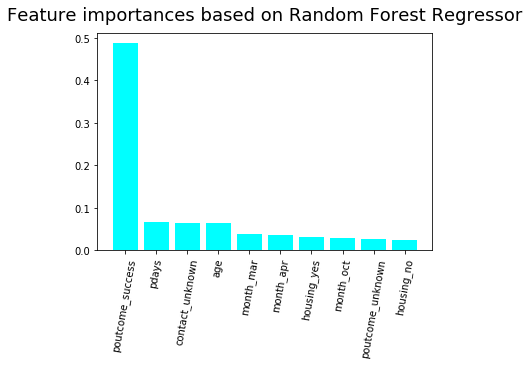

In [77]:
ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = data_scaled.columns
plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()